In [1]:
#import library
#link dataset -> https://www.kaggle.com/datasets/ananthr1/weather-prediction
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/content'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
#baca file excel
df = pd.read_csv('seattle-weather.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [3]:
df.duplicated().sum()

0

In [4]:
#cari unique value
df['weather'].unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

In [5]:
#ubah nama" weather menjadi 0,1,2,3,4
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['weather_label'] = le.fit_transform(df['weather'])
df.head(10)

,date,precipitation,temp_max,temp_min,wind,weather,weather_label
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,0
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2
2,2012-01-03,0.8,11.7,7.2,2.3,rain,2
3,2012-01-04,20.3,12.2,5.6,4.7,rain,2
4,2012-01-05,1.3,8.9,2.8,6.1,rain,2
5,2012-01-06,2.5,4.4,2.2,2.2,rain,2
6,2012-01-07,0.0,7.2,2.8,2.3,rain,2
7,2012-01-08,0.0,10.0,2.8,2.0,sun,4
8,2012-01-09,4.3,9.4,5.0,3.4,rain,2
9,2012-01-10,1.0,6.1,0.6,3.4,rain,2


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

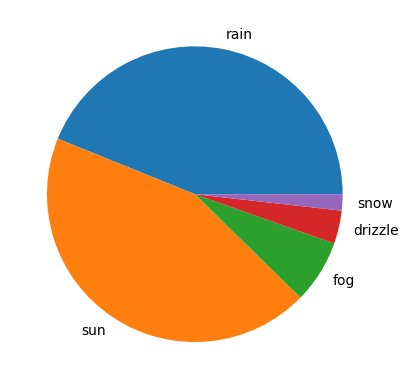

In [7]:
chart=df["weather"].value_counts()
mylabels=pd.DataFrame(chart)
mylabels=mylabels.index.to_list()
plt.pie(chart,labels=mylabels)
plt.show()

In [8]:
column_data = df['weather']

In [9]:
weather_dict = dict(zip(df['weather_label'], df['weather']))
weather_dict

{0: 'drizzle', 2: 'rain', 4: 'sun', 3: 'snow', 1: 'fog'}

In [10]:
import seaborn as sns

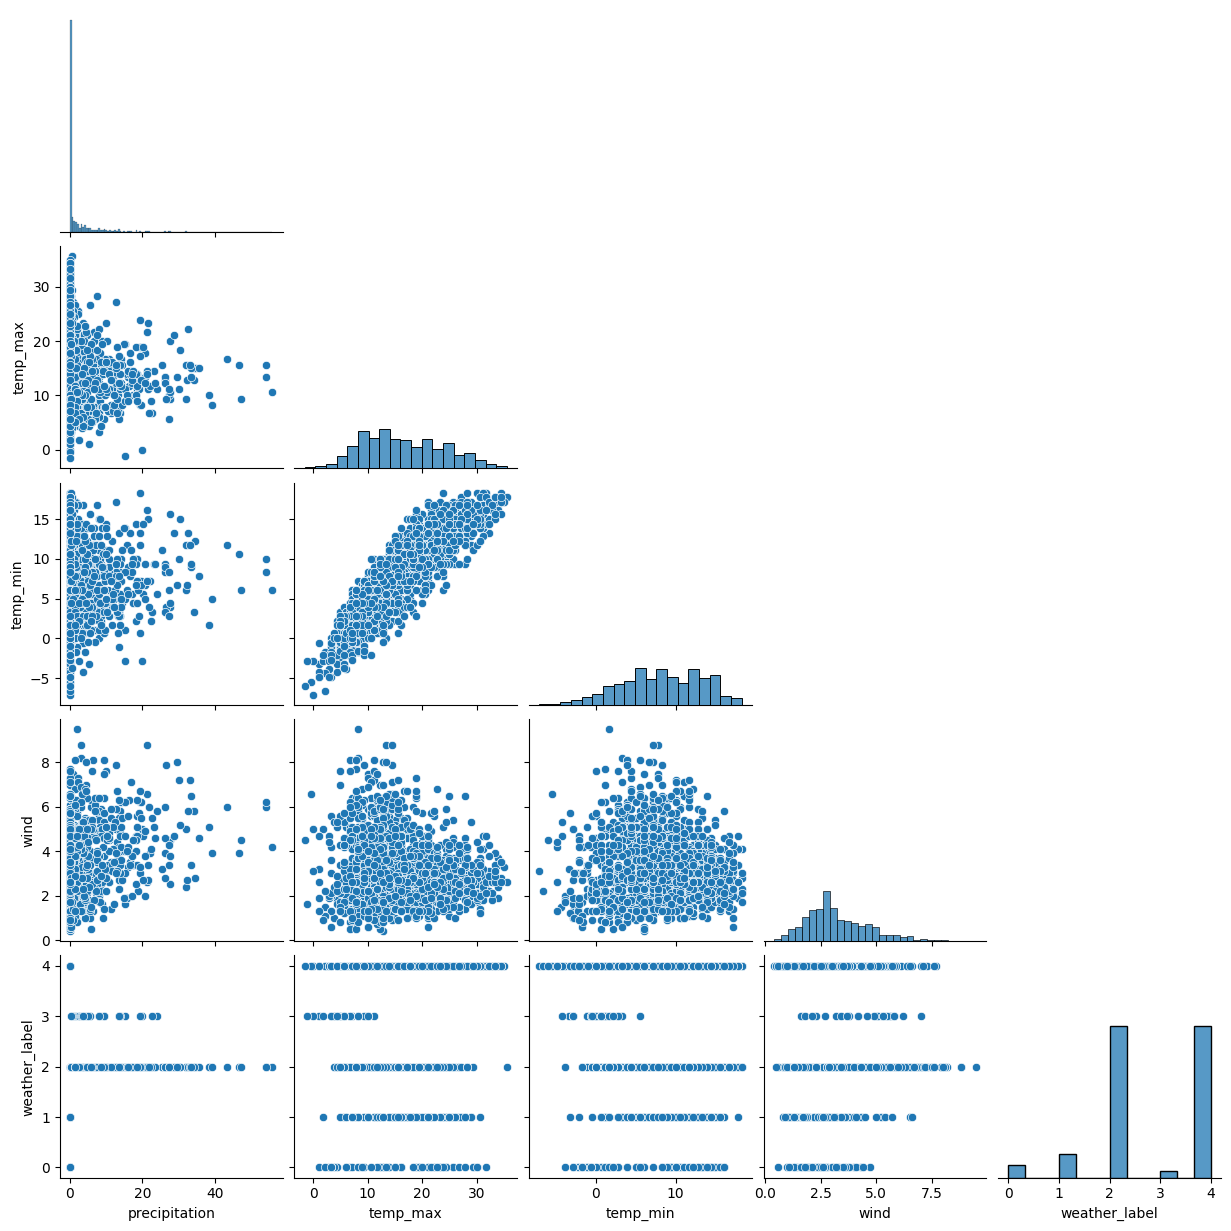

In [11]:
sns.pairplot(df, corner=True)

In [12]:
df['temp_range'] = df['temp_max'] - df['temp_min'] #gabungin tempmax dan min buat dimension reduction
df

,date,precipitation,temp_max,temp_min,wind,weather,weather_label,temp_range
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,0,7.8
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2,7.8
2,2012-01-03,0.8,11.7,7.2,2.3,rain,2,4.5
3,2012-01-04,20.3,12.2,5.6,4.7,rain,2,6.6
4,2012-01-05,1.3,8.9,2.8,6.1,rain,2,6.1
...,...,...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain,2,2.7
1457,2015-12-28,1.5,5.0,1.7,1.3,rain,2,3.3
1458,2015-12-29,0.0,7.2,0.6,2.6,fog,1,6.6
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun,4,6.6


In [13]:
df.drop(columns=['temp_max', 'temp_min'],axis=1,inplace=True)

In [14]:
weather_dict = dict(zip(df['weather_label'], df['weather']))
weather_dict

{0: 'drizzle', 2: 'rain', 4: 'sun', 3: 'snow', 1: 'fog'}

In [15]:
df.drop(columns=['weather'],axis=1,inplace=True)

In [16]:
df

,date,precipitation,wind,weather_label,temp_range
0,2012-01-01,0.0,4.7,0,7.8
1,2012-01-02,10.9,4.5,2,7.8
2,2012-01-03,0.8,2.3,2,4.5
3,2012-01-04,20.3,4.7,2,6.6
4,2012-01-05,1.3,6.1,2,6.1
...,...,...,...,...,...
1456,2015-12-27,8.6,2.9,2,2.7
1457,2015-12-28,1.5,1.3,2,3.3
1458,2015-12-29,0.0,2.6,1,6.6
1459,2015-12-30,0.0,3.4,4,6.6


In [17]:
#correlation matrix
df['date'] = pd.to_datetime(df['date'])
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,date,precipitation,wind,weather_label,temp_range
date,1.000000,0.014292,-0.039163,0.067043,0.064599
precipitation,0.014292,1.000000,0.328045,-0.267388,-0.344168
wind,-0.039163,0.328045,1.000000,-0.065858,-0.219639
weather_label,0.067043,-0.267388,-0.065858,1.000000,0.416392
temp_range,0.064599,-0.344168,-0.219639,0.416392,1.000000


In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
columns = ["precipitation", 'wind', 'temp_range']
scaler = StandardScaler()
data = df[columns]
scaled_df = scaler.fit_transform(data)

In [20]:
scaled_df

array([[-0.45364986,  1.01497975, -0.10587656],
       [ 1.17859791,  0.87583314, -0.10587656],
       [-0.33385186, -0.65477956, -0.97004227],
       ...,
       [-0.45364986, -0.44605965, -0.42011864],
       [-0.45364986,  0.11052679, -0.42011864],
       [-0.45364986,  0.18010009, -0.1320634 ]])

In [21]:
df['precipitation'] = df['precipitation'].astype(float)

In [22]:
#pca wind sama precipitation agar dimensi pada akhirnya cmn 2 column biar bs divisualisasi
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_df = pca.fit_transform(scaled_df)

In [23]:
pca_df

array([[ 0.3322716 ,  0.69231339],
       [ 1.27218403,  0.52713579],
       [-0.0233874 , -1.124921  ],
       ...,
       [-0.29142925, -0.59479265],
       [ 0.01315038, -0.18544878],
       [-0.10994612,  0.06058272]])

In [24]:
df.drop(columns=["precipitation", 'wind', 'temp_range'],axis=1,inplace=True)

In [25]:
pca_dframe = pd.DataFrame(pca_df, columns=['precipitation_wind', 'temp_range'])

In [26]:
pca_dframe

,precipitation_wind,temp_range
0,0.332272,0.692313
1,1.272184,0.527136
2,-0.023387,-1.124921
3,2.400383,0.362700
4,1.235546,1.100018
...,...,...
1456,1.195865,-1.181750
1457,-0.163040,-1.853215
1458,-0.291429,-0.594793
1459,0.013150,-0.185449


In [27]:
final_df = pd.concat([df, pca_dframe], axis=1)
df.drop(columns=['weather_label'],axis=1,inplace=True)

In [28]:
final_df['weather_label'], final_df['temp_range'] = final_df['temp_range'], final_df['weather_label']
final_df.rename(columns={'temp_range': 'weather_category'}, inplace=True)

In [29]:
final_df.rename(columns={'weather_label': 'temp_range'}, inplace=True)

In [30]:
final_df.drop(columns=['date'],axis=1,inplace=True)

In [31]:
final_df

,temp_range,precipitation_wind,weather_category
0,0.692313,0.332272,0
1,0.527136,1.272184,2
2,-1.124921,-0.023387,2
3,0.362700,2.400383,2
4,1.100018,1.235546,2
...,...,...,...
1456,-1.181750,1.195865,2
1457,-1.853215,-0.163040,2
1458,-0.594793,-0.291429,1
1459,-0.185449,0.013150,4


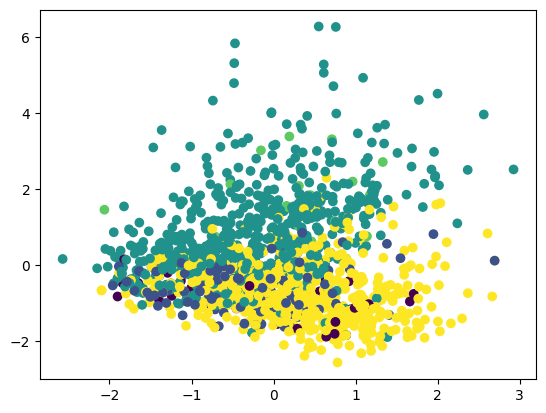

In [32]:
import matplotlib.pyplot as plt

plt.scatter(final_df.temp_range, final_df.precipitation_wind, c=final_df.weather_category)
plt.show()

In [33]:
x_final = final_df.iloc[:,[0,1]].values
y_final = final_df.iloc[:,2].values


In [34]:
x_final

array([[ 0.69231339,  0.3322716 ],
       [ 0.52713579,  1.27218403],
       [-1.124921  , -0.0233874 ],
       ...,
       [-0.59479265, -0.29142925],
       [-0.18544878,  0.01315038],
       [ 0.06058272, -0.10994612]])

In [35]:
#split data jadi 80% train 20% test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_final,y_final,test_size=1/5,random_state=0)

Fitting modelnya

In [36]:
from sklearn.neighbors import KNeighborsClassifier
# create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 5)
# fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [37]:
knn.predict(X_test)

array([4, 2, 2, 4, 4, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4, 4, 4, 2, 2, 2, 2, 2,
       2, 4, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2,
       4, 4, 2, 4, 4, 4, 4, 4, 4, 2, 4, 2, 4, 4, 2, 4, 4, 2, 4, 4, 1, 2,
       4, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 4, 2, 2,
       2, 4, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 4, 4, 4,
       2, 4, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2,
       4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 4, 2,
       4, 2, 4, 2, 4, 4, 4, 0, 2, 2, 2, 2, 1, 2, 2, 2, 4, 4, 4, 4, 2, 2,
       2, 1, 2, 4, 4, 1, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2, 2,
       2, 4, 2, 2, 4, 2, 2, 2, 2, 4, 4, 0, 2, 0, 2, 2, 2, 4, 4, 2, 2, 2,
       2, 4, 4, 2, 4, 4, 2, 4, 4, 4, 0, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2,
       4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 4, 1, 4, 4, 2, 2, 1, 4, 4,
       4, 2, 4, 2, 4, 1, 1, 4, 2, 2, 1, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4,
       4, 2, 2, 2, 1, 2, 4])

In [38]:
knn.score(X_test, y_test)

0.5836177474402731

In [39]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

y_pred = knn.predict(X_test)

print("Accuracy: {:.2f}%".format((accuracy_score(y_test, y_pred))*100))
print("Percision: {:.2f}%".format((precision_score(y_test, y_pred,average='weighted'))*100))
print("Recall: {:.2f}".format((recall_score(y_test, y_pred,average='weighted'))))
print("F1: {:.2f}".format((f1_score(y_test, y_pred,average='weighted'))))

Accuracy: 58.36%
Percision: 52.48%
Recall: 0.58
F1: 0.55


c:\Users\richa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 0,  0,  4,  0,  6],
       [ 0,  1,  9,  0, 19],
       [ 1,  0, 91,  0, 31],
       [ 0,  0,  6,  0,  0],
       [ 3,  9, 34,  0, 79]], dtype=int64)

buat ulang agar accuracy lbh bagus pake oversampling & undersampling


In [41]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.pipeline import Pipeline

X = final_df.drop(['weather_category'], axis = 1)
y = final_df['weather_category']


over_strategy = {0 : 1000, 1 : 1000, 2 : 1000, 3 : 1000, 4 : 1000}
under_strategy = {0 : 1000, 1 : 1000, 2 : 1000, 3 : 1000, 4 : 1000}

#oversampling semua yg dibawah 1000 jadi 1000 dan undersampling semua yg diatas 1000 jadi 1000
oversample = SMOTE(sampling_strategy = over_strategy)
undersample = RandomUnderSampler(sampling_strategy = under_strategy)

X_final,y = oversample.fit_resample(X,y)
X_final,y = undersample.fit_resample(X_final, y)

In [42]:
X_final.shape #buktiin klo oversampling dan undersapmling berhasil

(5000, 2)

In [43]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_final,y,random_state = 10, test_size = 0.2)

In [44]:
knn.fit(X_train2 ,y_train2)

KNeighborsClassifier()

In [45]:
knn.predict(X_test2)

array([0, 4, 4, 2, 3, 0, 0, 0, 3, 1, 0, 0, 0, 3, 0, 4, 0, 3, 1, 0, 4, 3,
       4, 4, 4, 0, 4, 3, 2, 2, 3, 2, 0, 4, 4, 0, 2, 1, 1, 0, 0, 3, 1, 4,
       0, 1, 4, 4, 1, 4, 4, 1, 3, 4, 0, 0, 4, 1, 3, 3, 2, 3, 2, 2, 1, 0,
       1, 3, 2, 3, 3, 0, 3, 4, 1, 2, 0, 2, 0, 0, 4, 3, 3, 2, 3, 4, 1, 0,
       3, 0, 0, 4, 0, 1, 3, 3, 3, 4, 1, 0, 4, 1, 4, 4, 0, 1, 1, 2, 3, 1,
       2, 4, 3, 3, 1, 3, 2, 2, 3, 3, 4, 3, 3, 0, 0, 0, 0, 3, 3, 3, 2, 1,
       2, 0, 4, 0, 3, 1, 2, 4, 0, 4, 1, 1, 0, 2, 0, 1, 4, 1, 3, 4, 4, 1,
       2, 2, 2, 1, 3, 1, 1, 0, 0, 1, 4, 3, 3, 2, 4, 1, 0, 4, 0, 3, 2, 1,
       3, 2, 0, 1, 1, 0, 2, 4, 3, 2, 2, 3, 0, 4, 0, 2, 3, 3, 0, 2, 3, 1,
       1, 0, 1, 2, 3, 0, 3, 1, 0, 1, 2, 4, 1, 4, 1, 0, 3, 3, 3, 2, 2, 1,
       3, 4, 0, 1, 2, 4, 1, 4, 2, 2, 4, 0, 3, 3, 1, 2, 1, 1, 1, 4, 0, 2,
       3, 2, 4, 0, 1, 1, 3, 2, 3, 4, 3, 3, 2, 0, 0, 3, 2, 1, 1, 0, 4, 1,
       3, 1, 3, 4, 0, 4, 3, 3, 0, 4, 3, 1, 0, 1, 4, 2, 3, 1, 1, 2, 3, 3,
       2, 2, 3, 4, 2, 4, 1, 0, 3, 0, 1, 4, 3, 4, 4,

In [46]:
y_pred2 = knn.predict(X_test2)

print("Accuracy: {:.2f}%".format((accuracy_score(y_test2, y_pred2))*100))
print("Percision: {:.2f}%".format((precision_score(y_test2, y_pred2,average='weighted'))*100))
print("Recall: {:.2f}".format((recall_score(y_test2, y_pred2,average='weighted'))))
print("F1: {:.2f}".format((f1_score(y_test2, y_pred2,average='weighted'))))

Accuracy: 68.40%
Percision: 68.28%
Recall: 0.68
F1: 0.68


In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test2, y_pred2)

array([[151,  19,   8,   1,  20],
       [ 33, 149,   7,   5,  22],
       [ 12,  21, 114,  30,  15],
       [  2,   3,  23, 156,   1],
       [ 32,  37,  19,   6, 114]], dtype=int64)



```
# This is formatted as code
```

ternyata setelah oversampling & undersampling, hasil accuracy precision dll menjadi lebih baik soalnya datanya sebelumnya imbalance dan tidak di oversample dan undersample